👩‍💻 Loan Approval Prediction with Logistic Regression



---



In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Load the dataset
data = pd.read_csv(r'/loan_data.csv')

# Data Exploration
print(data.head())
print(data.describe())
print(data.isnull().sum())

   person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561  

In [8]:
# Data Cleaning
data.fillna(method='ffill', inplace=True)

/tmp/ipython-input-181234188.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [9]:
# Feature selection based on domain knowledge or exploratory analysis
X = data[['person_income', 'credit_score', 'loan_amnt']]
y = data['loan_status']

In [10]:
# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Data normalization
mean = X_train.mean()
std = X_train.std()

X_train_scaled = (X_train - mean) / std
X_test_scaled = (X_test - mean) / std


In [12]:
# Training logistic regression model
model = LogisticRegression(max_iter=100)
model.fit(X_train_scaled, y_train) # Use scaled training data

LogisticRegression()

In [13]:
# Making predictions
y_pred = model.predict(X_test_scaled) # Use scaled test data
y_prob = model.predict_proba(X_test_scaled)[:, 1] # Use scaled test data for probabilities



In [14]:
# Evaluating model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"AUC Score: {auc_score:.4f}")


Accuracy: 0.79
Precision: 0.67
Recall: 0.12
AUC Score: 0.7459


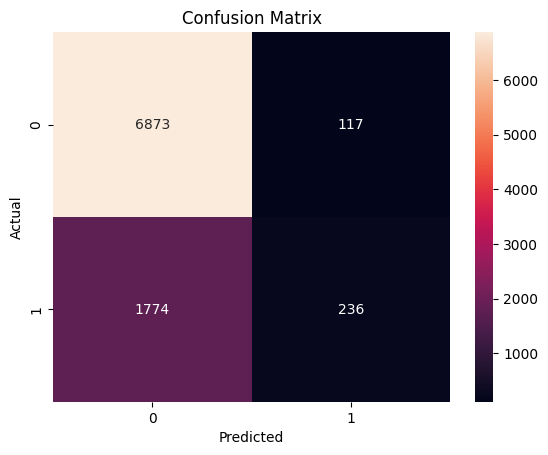

In [15]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

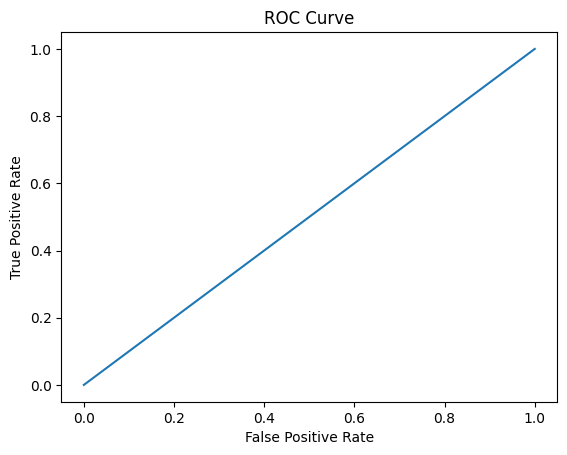

In [16]:
# ROC Curve
from sklearn.metrics import roc_curve

y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()